In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-04-29 19:34:39--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.006s  

2023-04-29 19:34:39 (7.97 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
dataset["sex"].replace({"male":0,"female":1},inplace=True)
dataset["smoker"].replace({"no":0,"yes":1},inplace=True)
dummies=pd.get_dummies(dataset["region"])
del dataset["region"]
dataset=pd.merge(dataset,dummies,left_index=True,right_index=True)

In [5]:

from sklearn.model_selection import train_test_split
X=dataset[["age","sex","bmi","children","smoker","northeast","northwest","southeast","southwest"]]
y=dataset["expenses"]
train_dataset,test_dataset,train_labels,test_labels=train_test_split(X,y,test_size=0.2)

In [6]:

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))
     

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=64,activation="relu"),
    layers.Dense(units=32,activation="relu"),
    layers.Dense(units=8,activation="relu"),
    layers.Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,012
Trainable params: 2,993
Non-trainable params: 19
_____________________________________________________

In [7]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.18),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()

In [8]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

9/9 - 0s - loss: 1237.7031 - mae: 1237.7031 - mse: 13132673.0000 - 48ms/epoch - 5ms/step
Testing set Mean Abs Error: 1237.70 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


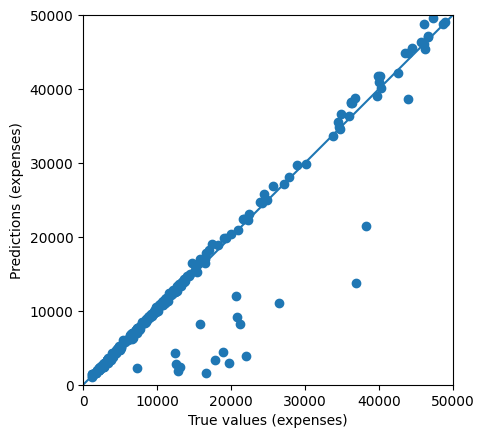

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)